<a href="https://colab.research.google.com/github/faijurrahman/AI/blob/main/Simple_Linear_Regression_Python_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Source: https://colab.research.google.com/drive/1FXgeJl7SaDqlNZw1WswDFRkjWNpKUgdQ?usp=sharing
#Explanation: https://www.youtube.com/watch?v=PxkzRL0LavU&list=PLKYEe2WisBTHOxrEG_COAgJTWnceouhRm&ab_channel=GregHogg
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Text(0, 0.5, 'Total Bedrooms')

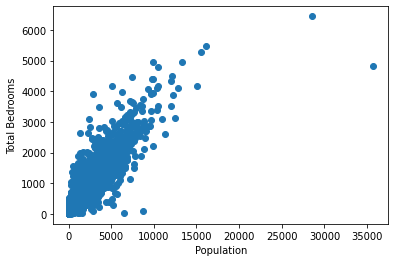

In [ ]:
import matplotlib.pyplot as plt

pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [ ]:
pop_np = pop.to_numpy()
bedrooms_np = bedrooms.to_numpy()

pop_np.shape, bedrooms_np.shape

((17000,), (17000,))

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(pop_np.reshape((17000, 1)), bedrooms_np)
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1)))
sklearn_bedroom_predictions.shape

(17000,)

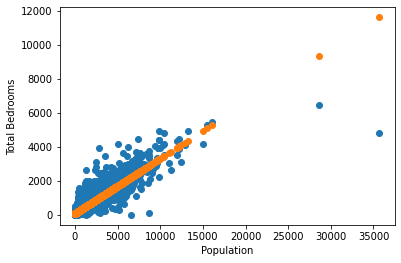

In [ ]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, sklearn_bedroom_predictions)

In [ ]:
predictions_df = pd.DataFrame({'Population':pop,
                               'Bedrooms':bedrooms,
                               'Sklearn Bedroom Predictions':sklearn_bedroom_predictions})
predictions_df

,Population,Bedrooms,Sklearn Bedroom Predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [ ]:
# Assuming total_bedrooms[i] = alpha + (beta * population[i]) + error
# Generally: y[i] = alpha + (beta * x[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_hat * x[i])

def get_predictions(model, x):
  '''
  Obtain the predictions for the given model and inputs.

  model: {'alpha_hat':Number, 'beta_hat':Number}
  x: np.array of Floats with shape (n,) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''
  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']

  return alpha_hat + beta_hat * x

In [ ]:
# Testing get_predictions

test_model = {'alpha_hat':1, 'beta_hat':1/2}
test_x = np.array([1, 4, 3])
get_predictions(test_model, test_x)

array([1.5, 3. , 2.5])

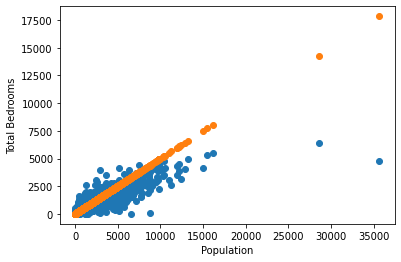

In [ ]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, get_predictions(test_model, pop_np))

In [ ]:
def mean_squared_error(y, y_predictions):
  '''
  Returns the mean squared error given the observed and predicted outputs.
  
  y: np.array of Floats with shape (n,) of observed outputs
  y_predictions: np.array of Floats with shape (n,) of predicted outputs

  Returns: Float representing the MSE.
  '''
  n = len(y)
  return np.sum(np.square(y - y_predictions)) / n

def mean_absolute_error(y, y_predictions):
  '''
  Returns the mean absolute error given the observed and predicted outputs.
  
  y: np.array of Floats with shape (n,) of observed outputs
  y_predictions: np.array of Floats with shape (n,) of predicted outputs

  Returns: Float representing the MSE.
  '''
  n = len(y)
  return np.sum(np.abs(y - y_predictions)) / n


In [ ]:
mse1 = mean_squared_error(get_predictions(test_model, pop_np), bedrooms)
mse1

111830.7436617647

In [ ]:
mae1 = mean_absolute_error(get_predictions(test_model, pop_np), bedrooms)
mae1

213.45373529411765

### Some formulas
$\hat{\beta} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$, $\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

In [ ]:
def get_best_model(x, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  x: np.array of Floats with shape (n,) of inputs
  y: np.array of Floats with shape (n,) of outputs

  Returns: {'alpha_hat':Float, 'beta_hat':Float} representing the model.
  '''

  x_bar = np.average(x)
  y_bar = np.average(y)

  top = np.sum((x - x_bar)*(y - y_bar))
  bot = np.sum((x - x_bar)**2)
  beta_hat = top / bot

  alpha_hat = y_bar - beta_hat*x_bar

  model = {'alpha_hat':alpha_hat, 'beta_hat':beta_hat}

  return model

In [ ]:
best_model = get_best_model(pop_np, bedrooms_np)
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

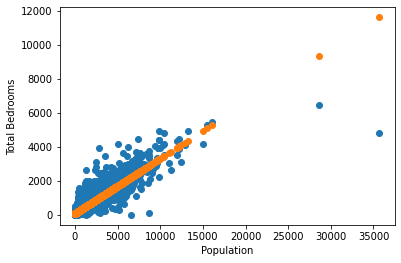

In [ ]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, get_predictions(best_model, pop_np))

In [ ]:
predictions_df['Our Model Predictions'] = get_predictions(best_model, pop_np)
predictions_df

,Population,Bedrooms,Sklearn Bedroom Predictions,Our Model Predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296


In [ ]:
# Show the mean absolute error for our model

mean_absolute_error(predictions_df['Bedrooms'],
                    predictions_df['Our Model Predictions'])

118.46978339085754